In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Apply TDA to Hopf bifurcation

In [5]:
def solve_system(A, b, h, times, CI=None):
    """ The function solve a 2D dynamical system of the form: dx/dt = A(x)*x + b.
    The solver is going to use Euler explicit as numerical method."""
    if isinstance(times, list):
        assert len(times)==2
    elif isinstance(times, int) or isinstance(times, float):
        assert times > 0
        times = [0, times]
    else:
        raise TypeError('The types accepted for the times varialble are list or number')
    if CI is None:
        CI = [0, 0]
    if isinstance(CI, np.ndarray):
        assert len(CI) == 2
    elif isinstance(CI, list):
        assert len(CI) == 2
        CI = np.array(CI)
    else:
        raise TypeError('The format is not supported for the initial conditions')
    if isinstance(b, np.ndarray):
        assert len(b) == 2
    elif isinstance(b, list):
        assert len(b) == 2
        b = np.array(b)
    else:
        raise TypeError('The format is not supported for the b')
    times = np.linspace(times[0], times[1], int((times[1]-times[0])/h))
    solutions = [CI]
    for time in times[1:]:
        new_x = solutions[-1] + (np.dot(A(solutions[-1]), solutions[-1]) + b)*h
        solutions.append(new_x)
    return times, solutions

In [3]:
class hopf_dynamical_system:
    def __init__(self, mu):
        self._A = lambda x: np.array([[0,1],[-1, mu-x[1]**2]])
        self._b = [0, 0]
    
    @property
    def mu(self, mu):
        self._A = lambda x: np.array([[0,1],[-1, mu-x[1]**2]])
    
    def solve(self, h, times, CI=None):
        return solve_system(self._A, self._b, h, times, CI)

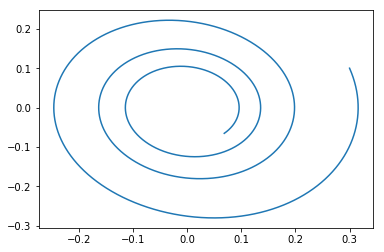

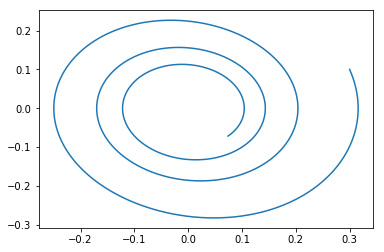

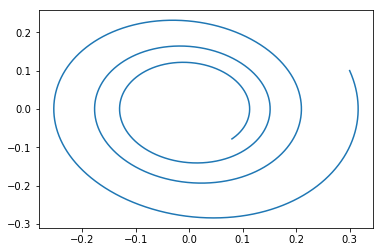

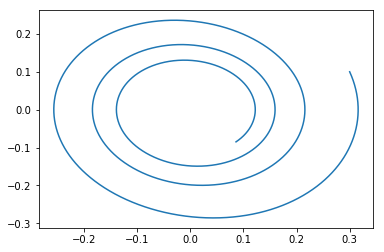

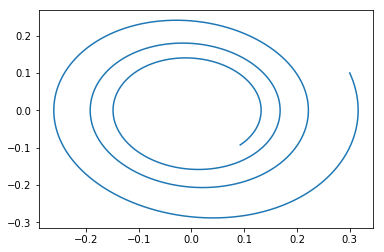

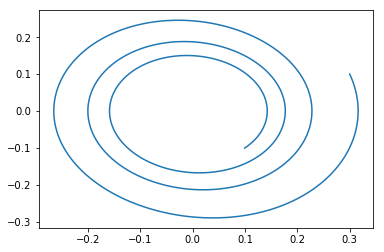

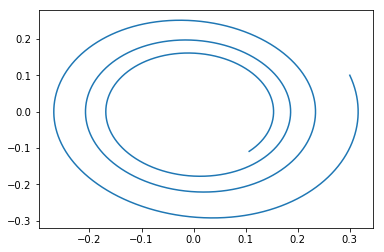

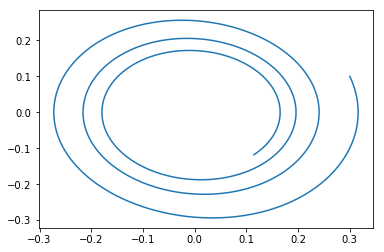

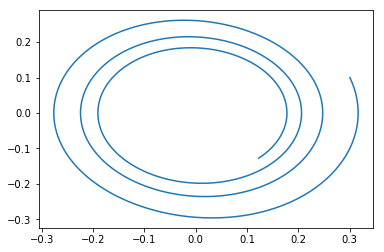

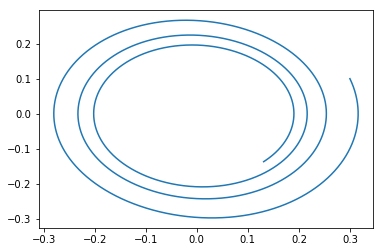

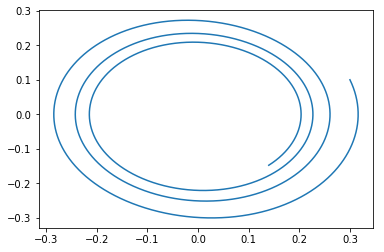

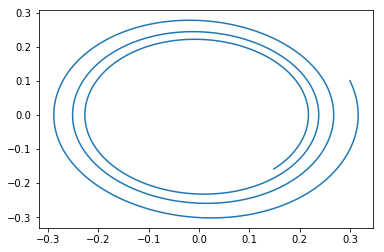

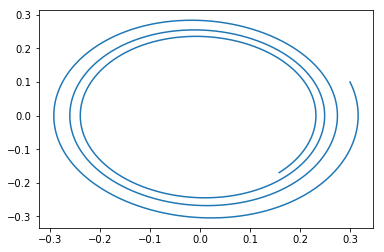

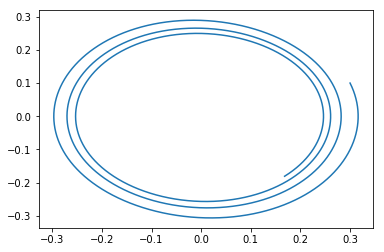

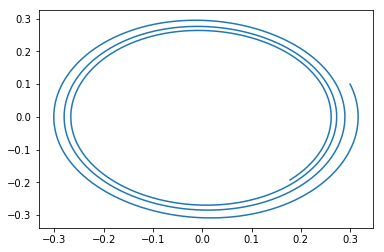

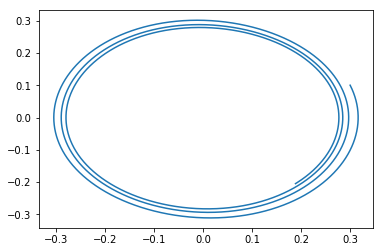

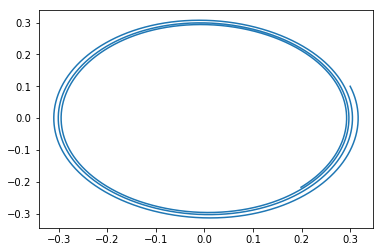

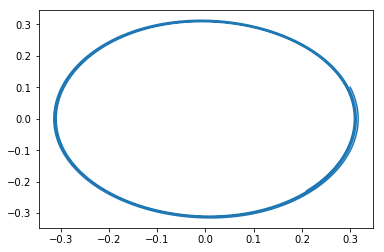

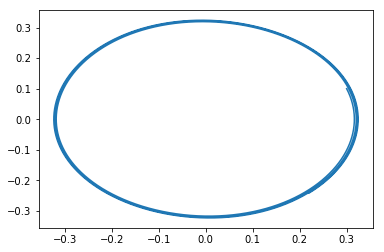

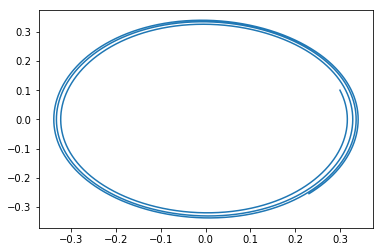

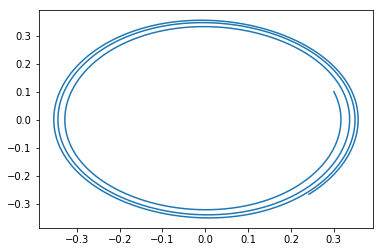

In [45]:
import matplotlib.pyplot as plt
plt.figure()
CI = [0.3, 0.1]
for mu in np.linspace(-0.1,0.1,21):
    hds = hopf_dynamical_system(mu)
    _, phase_coord = hds.solve(1e-4, 20, CI)
    plt.plot([x[0] for x in phase_coord], [x[1] for x in phase_coord])
    plt.show()

# Time Evolution

Let's consider now the time evolution of the system

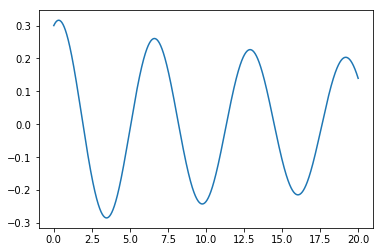

In [8]:
# fix mu=0
mu = 0
CI = [0.3, 0.1]
hds = hopf_dynamical_system(mu)
time, phase_coord = hds.solve(1e-4, 20, CI)
plt.figure()
plt.plot(time, [x[0] for x in phase_coord])
plt.show()

change the CI

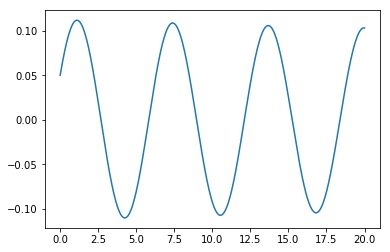

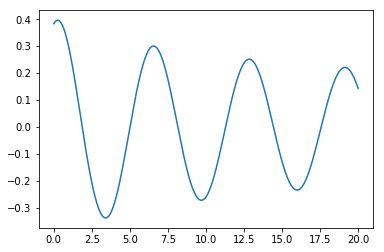

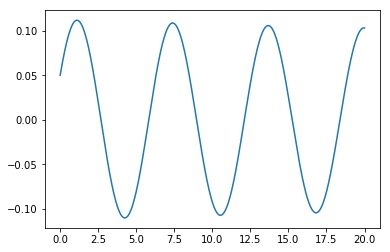

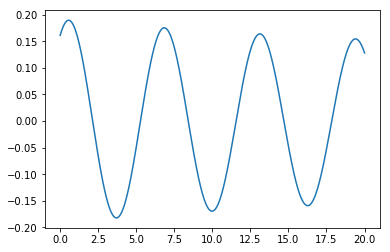

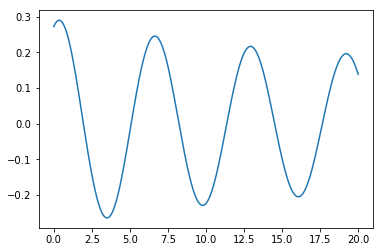

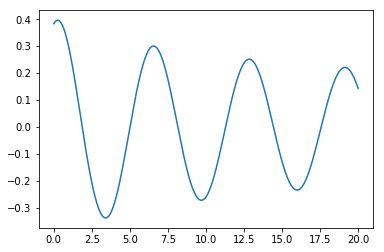

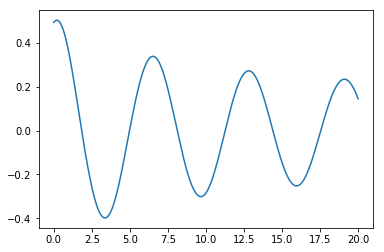

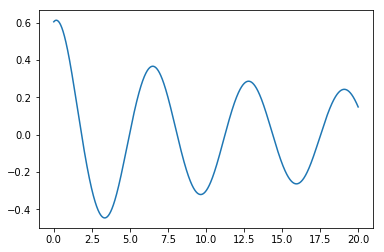

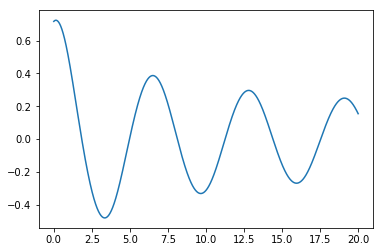

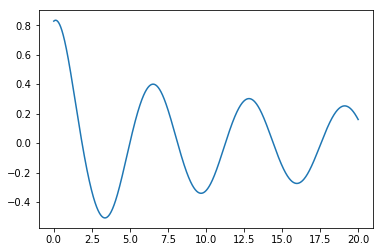

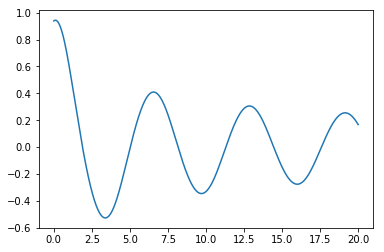

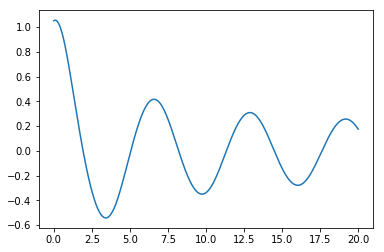

In [11]:
mu = 0
for dx in np.linspace(0,1,10):
    CI = [0.05+dx, 0.1]
    hds = hopf_dynamical_system(mu)
    time, phase_coord = hds.solve(1e-4, 20, CI)
    plt.figure()
    plt.plot(time, [x[0] for x in phase_coord])
plt.show()